# KNN(K-Nearest Neighbor) Classification with Scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

아래 실습 데이터는 16개 feature(infants, water, budget, education, ...)등의 Yes/No 상태를 이용하여 선호 정당이 Republican 인지, democrat 인지 분류해 보도록 하겠습니다. 이 때 사용할 알고리즘은 KNN(K-Nearest Neighbor) 입니다.

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(url, sep=',', header = None)
df.columns = ['party', 'infants', 'water', 'budget', 'physician','salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration','synfuels','education',
                     'superfund', 'crime', 'duty_free_exports','eaa_rsa']

In [4]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


- ? : 0과 1중 랜덤값 대체
- y : 1로 대체
- n : 0으로 대체

데이터에 일부가 깨져서 ?로 대체된 부분이 있습니다. 랜덤 값으로 y 또는 n로 변형하였습니다.

In [5]:
def f(x):
    if x == "?":
        return np.random.randint(0, 2)
    elif x == "y":
        return 1
    elif x == "n":
        return 0
    else:
        return x

In [6]:
df = df.applymap(f)

In [7]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1


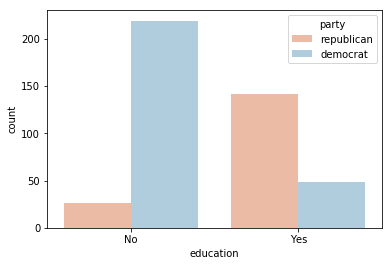

In [8]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

위 차트를 해석해 보면 Education = Yes인 사람들의 Republican 지지가 높고 Education = No인 사람들이 Democrat의 지지율이 높습니다.

이제 KNN을 이용하여 Classification을 하는 코드를 작성해 보도록 하겠습니다.<br>
Scikit-Learn의 KNeighborsClassifier를 추가합니다.

In [9]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

df에서 Input data X와 Target data y를 나눕니다. y를 따로 저장한 다음에 기존 df에서 y열을 제거한 결과를 X에 저장합니다.

In [10]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

In [11]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

fit(학습)을 마친 결과를 이용하여 predict를 합니다.

In [12]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

In [27]:
X_new = np.random.randint(0, 2, (1,16))
X_new

array([[1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]])

In [28]:
knn.predict(X_new)

array(['democrat'], dtype=object)